In [107]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import tensorflow as tf


In [108]:
data = pd.read_csv(r"E:\kaggle_dataset\stock_market\stock_market.csv")

In [109]:
data.head()

,Unnamed: 0,symbol,date,close,high,low,open,volumn,adjclose,adjhigh,adjlow,adjopen,adjvolumn,divcash,splitfactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1


In [110]:
data.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volumn,adjclose,adjhigh,adjlow,adjopen,adjvolumn,divcash,splitfactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1


In [111]:
df1 = data.reset_index()['close']

In [112]:
df1.head(10)

0    132.045
1    131.780
2    130.280
3    130.535
4    129.960
5    130.120
6    129.360
7    128.650
8    127.800
9    127.420
Name: close, dtype: float64

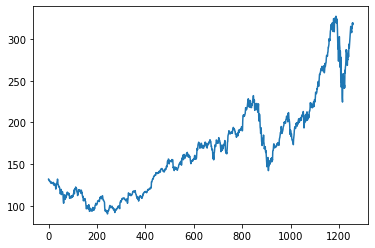

In [113]:
plt.plot(df1)

In [114]:
df2 = data.reset_index()['open']

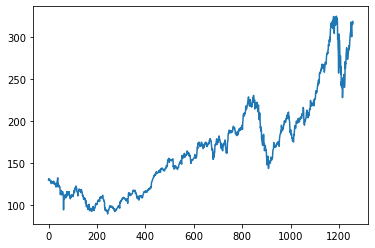

In [115]:
plt.plot(df2)

In [116]:
df3 = data.reset_index()['volumn']

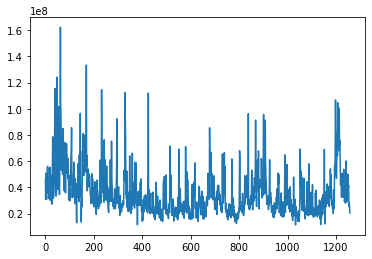

In [117]:
plt.plot(df3)

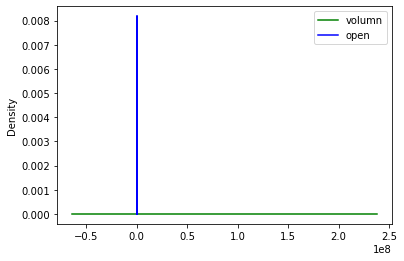

In [118]:
fig = plt.figure()
ax = fig.add_subplot(111)
data["volumn"].plot(kind="kde",ax=ax,color="green")
data.open.plot(kind='kde',ax=ax,color="blue")
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc="best")

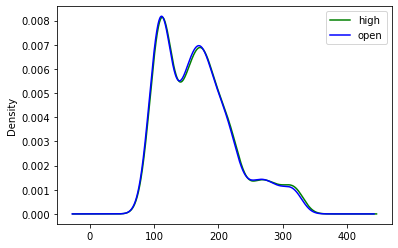

In [119]:
fig = plt.figure()
ax = fig.add_subplot(111)
data["high"].plot(kind="kde",ax=ax,color="green")
data.open.plot(kind='kde',ax=ax,color="blue")
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc="best")

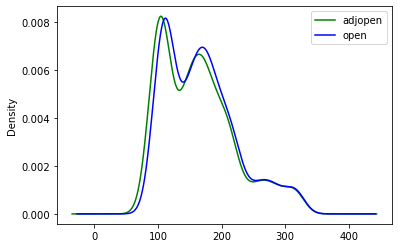

In [120]:
fig = plt.figure()
ax = fig.add_subplot(111)
data["adjopen"].plot(kind="kde",ax=ax,color="green")
data.open.plot(kind='kde',ax=ax,color="blue")
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc="best")

In [121]:
data.columns

Index(['Unnamed: 0', 'symbol', 'date', 'close', 'high', 'low', 'open',
       'volumn', 'adjclose', 'adjhigh', 'adjlow', 'adjopen', 'adjvolumn',
       'divcash', 'splitfactor'],
      dtype='object')

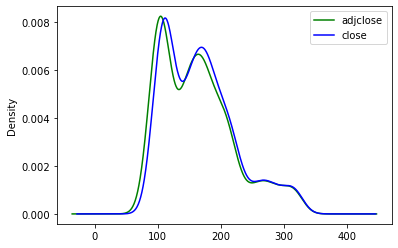

In [122]:
fig = plt.figure()
ax = fig.add_subplot(111)
data["adjclose"].plot(kind="kde",ax=ax,color="green")
data.close.plot(kind='kde',ax=ax,color="blue")
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc="best")

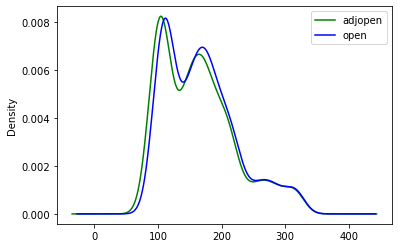

In [123]:
fig = plt.figure()
ax = fig.add_subplot(111)
data["adjopen"].plot(kind="kde",ax=ax,color="green")
data.open.plot(kind='kde',ax=ax,color="blue")
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc="best")

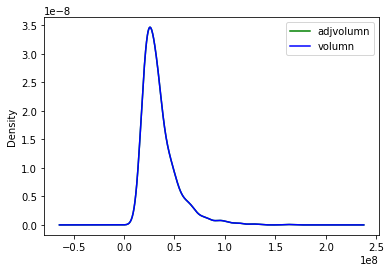

In [124]:
fig = plt.figure()
ax = fig.add_subplot(111)
data["adjvolumn"].plot(kind="kde",ax=ax,color="green")
data.volumn.plot(kind='kde',ax=ax,color="blue")
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc="best")

In [125]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [126]:
df1.shape

(1258, 1)

In [127]:
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [128]:
###spliting data
train_size = int(len(df1)*0.65)
test_size = len(df1)-train_size

In [129]:
train_data,test_data = df1[0:train_size,:],df1[train_size:len(df1),:1]

In [130]:
len(train_data),len(test_data)

(817, 441)

In [131]:
import numpy as np
def create_dataset(dataset,time_step=1):
    dataX,datay = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        datay.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(datay)    


In [132]:
time_step = 100
X_train,y_train = create_dataset(train_data,time_step)
X_test,y_test = create_dataset(test_data,time_step)

In [133]:
print(X_train)

[[0.17607447 0.17495567 0.16862282 ... 0.09055982 0.08388922 0.09085536]
 [0.17495567 0.16862282 0.1696994  ... 0.08388922 0.09085536 0.0873934 ]
 [0.16862282 0.1696994  0.16727181 ... 0.09085536 0.0873934  0.09030651]
 ...
 [0.34801148 0.32930845 0.32145571 ... 0.50042219 0.50413747 0.5062062 ]
 [0.32930845 0.32145571 0.32694419 ... 0.50413747 0.5062062  0.51920966]
 [0.32145571 0.32694419 0.32230009 ... 0.5062062  0.51920966 0.53719497]]


In [134]:
print(X_train.shape),print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [135]:
print(X_test.shape),print(y_test.shape)

(340, 100)
(340,)


(None, None)

In [136]:
### for lstm model we need to convert our xtrain into 3d array
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [137]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [388]:
model = Sequential()
model.add(LSTM(50,return_sequences = True,input_shape = (100,1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error',optimizer = 'adam')

In [389]:
model.fit(X_train,y_train,validation_data = (X_test,y_test),verbose = 1,epochs = 100,batch_size = 64)

Epoch 1/100
12/12 [==============================] - 4s 373ms/step - loss: 0.0149 - val_loss: 0.0568
Epoch 2/100
12/12 [==============================] - 2s 204ms/step - loss: 0.0025 - val_loss: 0.0080
Epoch 3/100
12/12 [==============================] - 2s 176ms/step - loss: 9.2381e-04 - val_loss: 0.0042
Epoch 4/100
12/12 [==============================] - 2s 194ms/step - loss: 7.2628e-04 - val_loss: 0.0045
Epoch 5/100
12/12 [==============================] - 2s 169ms/step - loss: 6.5031e-04 - val_loss: 0.0047
Epoch 6/100
12/12 [==============================] - 2s 191ms/step - loss: 6.3395e-04 - val_loss: 0.0051
Epoch 7/100
12/12 [==============================] - 2s 183ms/step - loss: 6.3118e-04 - val_loss: 0.0053
Epoch 8/100
12/12 [==============================] - 2s 181ms/step - loss: 6.1881e-04 - val_loss: 0.0047
Epoch 9/100
12/12 [==============================] - 2s 188ms/step - loss: 6.0509e-04 - val_loss: 0.0044
Epoch 10/100
12/12 [==============================] - 2s 169ms/

In [390]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [391]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [392]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [393]:
import math
from sklearn.metrics import mean_squared_error

In [394]:
math.sqrt(mean_squared_error(y_train,train_predict))

141.46220217897172

In [395]:
math.sqrt(mean_squared_error(y_test,test_predict))

235.7519507968253

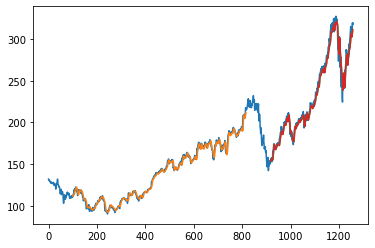

In [396]:
###plotting graph

look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict


plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [397]:
len(test_data)

441

In [398]:
X_input = test_data[341:].reshape(1,-1)
X_input.shape

(1, 100)

In [399]:
X_input = test_data[341:].reshape(1,-1)
X_input

array([[0.85835515, 0.8866419 , 0.87431394, 0.88431985, 0.87836697,
        0.8986321 , 0.92582116, 0.92877649, 0.95676771, 0.93869797,
        0.93304061, 0.94950604, 0.96424048, 0.95512117, 0.95989192,
        0.96635143, 0.96246728, 0.92295027, 0.9598497 , 0.98792536,
        0.98594106, 0.92531453, 0.92172591, 0.96474711, 0.97572406,
        0.99159841, 0.96972895, 0.97614625, 0.96795575, 1.        ,
        0.99016297, 0.99050072, 0.96538039, 0.98488559, 0.97086887,
        0.94026007, 0.87748037, 0.83483915, 0.85413324, 0.77336823,
        0.77269273, 0.88014017, 0.84007431, 0.89673225, 0.85527316,
        0.83884995, 0.74233725, 0.82327113, 0.78143207, 0.6665963 ,
        0.7921557 , 0.64118044, 0.68614371, 0.66001013, 0.65203074,
        0.58642236, 0.56586169, 0.66089673, 0.65515494, 0.70970193,
        0.66452757, 0.69437642, 0.69218104, 0.63569197, 0.65266402,
        0.63780292, 0.7267162 , 0.71388162, 0.74191506, 0.75002111,
        0.77222832, 0.83049059, 0.8194292 , 0.82

In [400]:
temp_input = list(X_input)
temp_input = temp_input[0].tolist()

In [401]:
temp_input

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.82327113062568

In [431]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.99016297 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007
 0.87748037 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017
 0.84007431 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113
 0.78143207 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013
 0.65203074 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193
 0.66452757 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292
 0.7267162  0.71388162 0.74191506 0.75002111 0.77222832 0.83049059
 0.8194292  0.8289707  0.8125475  0.78776492 0.75162543 0.78426074
 0.77974331 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843
 0.83901883 0.85628641 0.87486279 0.88782403 0.90095415 0.92793211
 0.948535   0.93333615 0.91746179 0.92544119 0.91771511 0.9483239
 0.94064004 0.96635143 0.9563033  0.96491598 0.9429515  0.93651432
 0.92660058 0.91707021 0.90950888 0.9042592  0.90101379 0.89917552
 0.89809471 0.89721966 0.89617151 0.89476097 0.89296067 0.8908568
 0.88859272 0.88632119 0.88416767 0.88221443 0.88049

7 day output [[0.86018234]]
8 day input [0.85413324 0.77336823 0.77269273 0.88014017 0.84007431 0.89673225
 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207 0.6665963
 0.7921557  0.64118044 0.68614371 0.66001013 0.65203074 0.58642236
 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757 0.69437642
 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162  0.71388162
 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292  0.8289707
 0.8125475  0.78776492 0.75162543 0.78426074 0.77974331 0.81326522
 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883 0.85628641
 0.87486279 0.88782403 0.90095415 0.92793211 0.948535   0.93333615
 0.91746179 0.92544119 0.91771511 0.9483239  0.94064004 0.96635143
 0.9563033  0.96491598 0.9429515  0.93651432 0.92660058 0.91707021
 0.90950888 0.9042592  0.90101379 0.89917552 0.89809471 0.89721966
 0.89617151 0.89476097 0.89296067 0.8908568  0.88859272 0.88632119
 0.88416767 0.88221443 0.88049459 0.87900037 0.87769544 0.87652957
 0.87545103 0.8744154  0

15 day output [[0.8523301]]
16 day input [0.74233725 0.82327113 0.78143207 0.6665963  0.7921557  0.64118044
 0.68614371 0.66001013 0.65203074 0.58642236 0.56586169 0.66089673
 0.65515494 0.70970193 0.66452757 0.69437642 0.69218104 0.63569197
 0.65266402 0.63780292 0.7267162  0.71388162 0.74191506 0.75002111
 0.77222832 0.83049059 0.8194292  0.8289707  0.8125475  0.78776492
 0.75162543 0.78426074 0.77974331 0.81326522 0.8141096  0.79473106
 0.83336148 0.85898843 0.83901883 0.85628641 0.87486279 0.88782403
 0.90095415 0.92793211 0.948535   0.93333615 0.91746179 0.92544119
 0.91771511 0.9483239  0.94064004 0.96635143 0.9563033  0.96491598
 0.9429515  0.93651432 0.92660058 0.91707021 0.90950888 0.9042592
 0.90101379 0.89917552 0.89809471 0.89721966 0.89617151 0.89476097
 0.89296067 0.8908568  0.88859272 0.88632119 0.88416767 0.88221443
 0.88049459 0.87900037 0.87769544 0.87652957 0.87545103 0.8744154
 0.87339181 0.87236166 0.87131923 0.8702665  0.86921042 0.8681584
 0.8671177  0.86609203 0

25 day output [[0.842636]]
26 day input [0.56586169 0.66089673 0.65515494 0.70970193 0.66452757 0.69437642
 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162  0.71388162
 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292  0.8289707
 0.8125475  0.78776492 0.75162543 0.78426074 0.77974331 0.81326522
 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883 0.85628641
 0.87486279 0.88782403 0.90095415 0.92793211 0.948535   0.93333615
 0.91746179 0.92544119 0.91771511 0.9483239  0.94064004 0.96635143
 0.9563033  0.96491598 0.9429515  0.93651432 0.92660058 0.91707021
 0.90950888 0.9042592  0.90101379 0.89917552 0.89809471 0.89721966
 0.89617151 0.89476097 0.89296067 0.8908568  0.88859272 0.88632119
 0.88416767 0.88221443 0.88049459 0.87900037 0.87769544 0.87652957
 0.87545103 0.8744154  0.87339181 0.87236166 0.87131923 0.8702665
 0.86921042 0.8681584  0.8671177  0.86609203 0.8650828  0.86408788
 0.86310416 0.86212826 0.86115515 0.86018234 0.85920781 0.85823041
 0.85724968 0.85626662 0

In [432]:
day_new = np.arange(1,101)
day_pred= np.arange(101,131)

In [433]:
len(df1)

1258

In [434]:
df3 = df1.tolist()
df3.extend(lst_output)

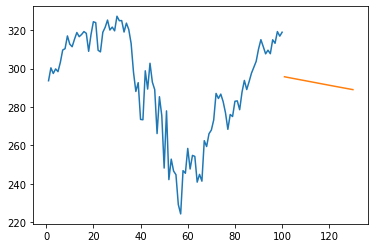

In [437]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
#red color is the predicted line for nxt 30 days

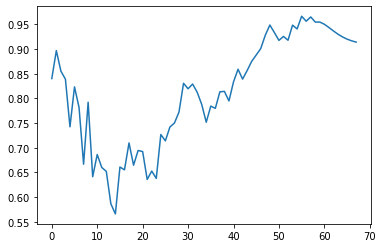

In [386]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

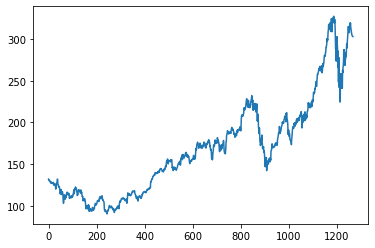

In [417]:

df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)

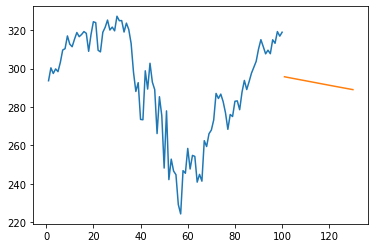

In [436]:

plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))